In [22]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

In [ ]:
tickers=pd.DataFrame(get_symbols())
tickers.head()

tickers = ["SPY", "IWM"]
end_date = datetime.now()
# TIme Delta is based on Biden's election and inauguration
start_date = end_date + timedelta(-1172)
stocks_data = get_historical_data(tickers, start_date, end_date,  output_format='pandas')
stocks_data.head()

In [26]:
# import yfinance
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [27]:
#Get SPY Data for last 1172 days
data = yf.download("SPY", start="2017-01-20", end="2021-03-06")
#spy_data = yf.download("SPY", start="2017-01-20", end="2020-04-06")
#spy_data = pdr.get_data_yahoo("SPY", start="2017-01-20", end="2020-04-06")

[*********************100%***********************]  1 of 1 completed


In [28]:
# Put into Pandas DataFrame
spy = pd.DataFrame(data)
spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,385.589996,390.920013,380.570007,389.579987,388.308197,104945700
2021-03-02,389.820007,390.070007,386.000000,386.540009,385.278137,79389200
2021-03-03,385.790009,386.829987,381.309998,381.420013,380.174835,119482700
2021-03-04,381.220001,384.000000,371.880005,376.700012,375.470245,182856500
2021-03-05,380.459991,384.760010,372.640015,383.630005,382.377625,151959800


In [29]:
# Clean Data and Drop non-essential columns
spy_data= spy.drop(columns=["High", "Low", "Open", "Volume", "Close"])
spy_data.columns = ["Close"]
spy_data.tail()

,Close
Date,
2021-03-01,388.308197
2021-03-02,385.278137
2021-03-03,380.174835
2021-03-04,375.470245
2021-03-05,382.377625


In [30]:
# Calculate the portfolio daily returns
spy_data["Daily Returns"] = spy_data["Close"].pct_change()


# Calculate the Cumulative returns
spy_data["Cumulative Returns"]= (1+ spy_data["Daily Returns"]).cumprod()-1

# Validate Data
spy_data.tail()


,Close,Daily Returns,Cumulative Returns
Date,,,
2021-03-01,388.308197,0.024240,0.852614
2021-03-02,385.278137,-0.007803,0.838158
2021-03-03,380.174835,-0.013246,0.813810
2021-03-04,375.470245,-0.012375,0.791365
2021-03-05,382.377625,0.018397,0.824320


In [31]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
spy_evaluation_df = pd.DataFrame(index=metrics, columns=columns)


# Annualized Returns
spy_evaluation_df.loc['Annual Return'] = (
    spy_data['Daily Returns'].mean() * 252
)

# Calculate cumulative return
spy_evaluation_df.loc["Cumulative Returns"] =  (spy_data['Cumulative Returns'])

# Calculate annual volatility
spy_evaluation_df.loc['Annual Volatility'] = (
    spy_data['Daily Returns'].std() * np.sqrt(252)
)

# Calculate Sharpe Ratio 
spy_evaluation_df.loc['Sharpe Ratio'] = (
    spy_data['Daily Returns'].mean() * 252) / (
    spy_data['Daily Returns'].std() * np.sqrt(252)
)

# Calculate cumulative return
spy_evaluation_df.loc['Cumulative Returns'] = spy_data['Cumulative Returns'][-1]

# Calculate Downside Return
sortino_ratio_df = spy_data[['Daily Returns']]
sortino_ratio_df.loc[:,'Downside Returns'] = 0
sortino_ratio_df.head()

target = 0
mask = sortino_ratio_df['Daily Returns'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Daily Returns']**2

# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)
expected_return = sortino_ratio_df['Daily Returns'].mean() * 252
sortino_ratio = expected_return/down_stdev

spy_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

spy_evaluation_df

,Backtest
Annual Return,0.166375
Cumulative Returns,0.82432
Annual Volatility,0.200521
Sharpe Ratio,0.829713
Sortino Ratio,1.13812


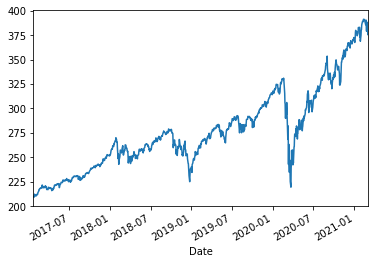

In [32]:
spy_data['Close'].plot()

In [33]:
import hvplot.pandas
spy_data.hvplot.line(x='Date', y='Close', line_color="green")

:Curve   [Date]   (Close)